# Part 4 - Batch Geocoding

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Batch-sizes-(max-and-suggested-batch-sizes)" data-toc-modified-id="Batch-sizes-(max-and-suggested-batch-sizes)-2">Batch sizes (max and suggested batch sizes)</a></span></li><li><span><a href="#Batch-geocode-single-line-addresses,-multi-line-addresses" data-toc-modified-id="Batch-geocode-single-line-addresses,-multi-line-addresses-3">Batch geocode single line addresses, multi-line addresses</a></span><ul class="toc-item"><li><span><a href="#Single-Line-Addresses" data-toc-modified-id="Single-Line-Addresses-3.1">Single Line Addresses</a></span></li><li><span><a href="#Multi-line-Addresses" data-toc-modified-id="Multi-line-Addresses-3.2">Multi-line Addresses</a></span></li></ul></li><li><span><a href="#Get-geocoded-results-as-a-FeatureSet-object" data-toc-modified-id="Get-geocoded-results-as-a-FeatureSet-object-4">Get geocoded results as a <code>FeatureSet</code> object</a></span></li><li><span><a href="#Batch-geocoding-using-geocode_from_items()" data-toc-modified-id="Batch-geocoding-using-geocode_from_items()-5">Batch geocoding using geocode_from_items()</a></span></li><li><span><a href="#Example-of-geocoding-POIs-(category-param)" data-toc-modified-id="Example-of-geocoding-POIs-(category-param)-6">Example of geocoding POIs (category param)</a></span><ul class="toc-item"><li><span><a href="#category-parameter" data-toc-modified-id="category-parameter-6.1"><code>category</code> parameter</a></span></li><li><span><a href="#Example:-Finding-airports-using-their-codes" data-toc-modified-id="Example:-Finding-airports-using-their-codes-6.2">Example: Finding airports using their codes</a></span></li></ul></li><li><span><a href="#Examples-of-source_country-and-lang_code" data-toc-modified-id="Examples-of-source_country-and-lang_code-7">Examples of <code>source_country</code> and <code>lang_code</code></a></span><ul class="toc-item"><li><span><a href="#source_country-parameter" data-toc-modified-id="source_country-parameter-7.1"><code>source_country</code> parameter</a></span></li><li><span><a href="#lang_code-parameter" data-toc-modified-id="lang_code-parameter-7.2"><code>lang_code</code> parameter</a></span></li><li><span><a href="#Example:-Finding-Indian-Cities-and-Return-Results-in-Hindi" data-toc-modified-id="Example:-Finding-Indian-Cities-and-Return-Results-in-Hindi-7.3">Example: Finding Indian Cities and Return Results in Hindi</a></span></li></ul></li><li><span><a href="#Getting-results-in-desired-coordinate-system" data-toc-modified-id="Getting-results-in-desired-coordinate-system-8">Getting results in desired coordinate system</a></span><ul class="toc-item"><li><span><a href="#out_sr-parameter" data-toc-modified-id="out_sr-parameter-8.1"><code>out_sr</code> parameter</a></span></li></ul></li><li><span><a href="#How-to-handle-the-response-of-error/exception" data-toc-modified-id="How-to-handle-the-response-of-error/exception-9">How to handle the response of error/exception</a></span></li><li><span><a href="#Avoiding-fallbacks" data-toc-modified-id="Avoiding-fallbacks-10">Avoiding fallbacks</a></span><ul class="toc-item"><li><span><a href="#Example:-Batch-geocode-with-fallback-allowed-(no-category)" data-toc-modified-id="Example:-Batch-geocode-with-fallback-allowed-(no-category)-10.1">Example: Batch geocode with fallback allowed (no category)</a></span></li><li><span><a href="#Example:-Batch-geocode-with-no-fallback-allowed-(category=&quot;Point-Address&quot;)" data-toc-modified-id="Example:-Batch-geocode-with-no-fallback-allowed-(category=&quot;Point-Address&quot;)-10.2">Example: Batch geocode with no fallback allowed (<code>category="Point Address"</code>)</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-11">Conclusions</a></span></li></ul></div>

## Introduction

The `batch_geocode()` function in the `arcgis.geocoding` module geocodes an entire list of addresses. Geocoding many addresses at once is also known as bulk geocoding. You can use this method upon finding the following types of locations:

 - Street addresses (e.g. `27488 Stanford Ave, Bowden, North Dakota`, or `380 New York St, Redlands, CA 92373`)
 - Administrative place names, such as city, county, state, province, or country names (e.g. `Seattle, Washington`, `State of Mahārāshtra`, or `Liechtenstein`)
 - Postal codes: (e.g. `92591` or `TW9 1DN`)

## Batch sizes (max and suggested batch sizes)

There is a limit to the maximum number of addresses that can be geocoded in a single batch request with the geocoder. The `MaxBatchSize` property defines this limit. For instance, if MaxBatchSize=2000, and 3000 addresses are sent as input, only the first 2000 will be geocoded. The `SuggestedBatchSize` property is also useful as it specifies the optimal number of addresses to include in a single batch request.

Both of these properties can be determined by querying the geocoder:

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import get_geocoders, batch_geocode
from arcgis.map import Map
from arcgis.map.popups import PopupInfo

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/john3092/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
gis = GIS(profile="your_enterprise_profile")

In [15]:
# use the first of GIS's configured geocoders
geocoder = get_geocoders(gis)[0]

In [32]:
print("For current geocoder:")
print(" - MaxBatchSize: " + str(geocoder.properties.locatorProperties.MaxBatchSize))
print(" - SuggestedBatchSize: " + str(geocoder.properties.locatorProperties.SuggestedBatchSize))

For current geocoder:
 - MaxBatchSize: 1000
 - SuggestedBatchSize: 150


## Batch geocode single line addresses, multi-line addresses

The `batch_geocode()` function supports searching for lists of places and addresses. Each address in the list can be specified as a single line of text (single field format), or in multi-field format with the address components separated into mulitple parameters.

The code snippet below imports the `geocode` function and displays its signature and parameters along with a brief description:

In [3]:
help(batch_geocode)

Help on function batch_geocode in module arcgis.geocoding._functions:

batch_geocode(addresses: 'Union[list[str], dict[str, str]]', source_country: 'Optional[str]' = None, category: 'Optional[str]' = None, out_sr: 'Optional[dict]' = None, geocoder: 'Optional[Geocoder]' = None, as_featureset: 'bool' = False, match_out_of_range: 'bool' = True, location_type: 'str' = 'street', search_extent: 'Optional[Union[list[dict[str, Any]], dict[str, Any]]]' = None, lang_code: 'str' = 'EN', preferred_label_values: 'Optional[str]' = None, out_fields: 'Optional[str]' = None)
    The ``batch_geocode`` function geocodes an entire list of addresses.
    
    .. note::
        Geocoding many addresses at once is also known as bulk geocoding.
    
    =========================     ================================================================
    **Parameter**                  **Description**
    -------------------------     ----------------------------------------------------------------
    addresses  

The `address` parameter will be a list of addresses to be geocoded, and you can choose between:
 - a single line of text — single field batch geocoding — use a string. 
 - or multiple lines of text — multifield batch geocoding — use the address fields described in Part 3.

The Geocoder provides localized versions of the input field names in all locales supported by it.

### Single Line Addresses

In [34]:
addresses = ["380 New York St, Redlands, CA", 
             "1 World Way, Los Angeles, CA",
             "1200 Getty Center Drive, Los Angeles, CA", 
             "5905 Wilshire Boulevard, Los Angeles, CA",
             "100 Universal City Plaza, Universal City, CA 91608",
             "4800 Oak Grove Dr, Pasadena, CA 91109"]

In [35]:
results = batch_geocode(addresses)


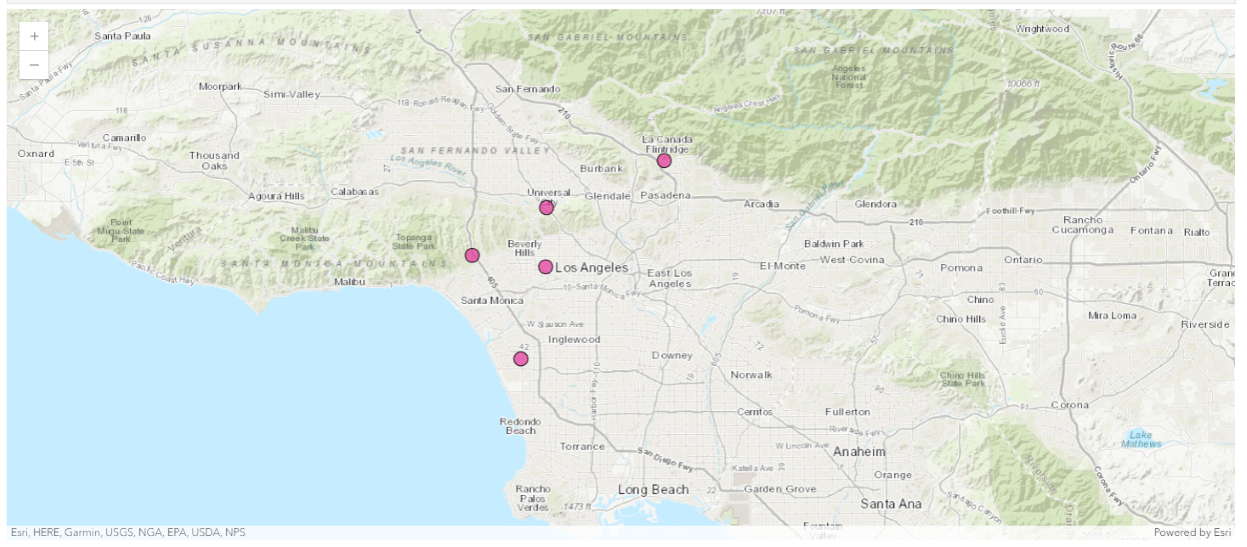

In [51]:
map0 = Map("Los Angeles")
map0

In [37]:
map0.zoom = 9

In [39]:
for address in results:
    address['location'].update({"spatialReference" : {"wkid" : 4326}})

In [40]:
for address in results:
    map0.content.draw(address['location'])
    print(address['score'])

100
100
99.41
100
100
100


Each match has keys for score, location, attributes and address:

In [41]:
results[0].keys()

dict_keys(['address', 'location', 'score', 'attributes'])

### Multi-line Addresses

The earlier example showed how to call `batch_geocode()` with single line addresses. The following example illustrates how to call `batch_geocode()` with a list of multi-field addresses.

In [42]:
addresses= [{
                "Address": "380 New York St.",
                "City": "Redlands",
                "Region": "CA",
                "Postal": "92373"
            },{
                "Address": "1 World Way",
                "City": "Los Angeles",
                "Region": "CA",
                "Postal": "90045"
            }]

In [43]:
results = batch_geocode(addresses)


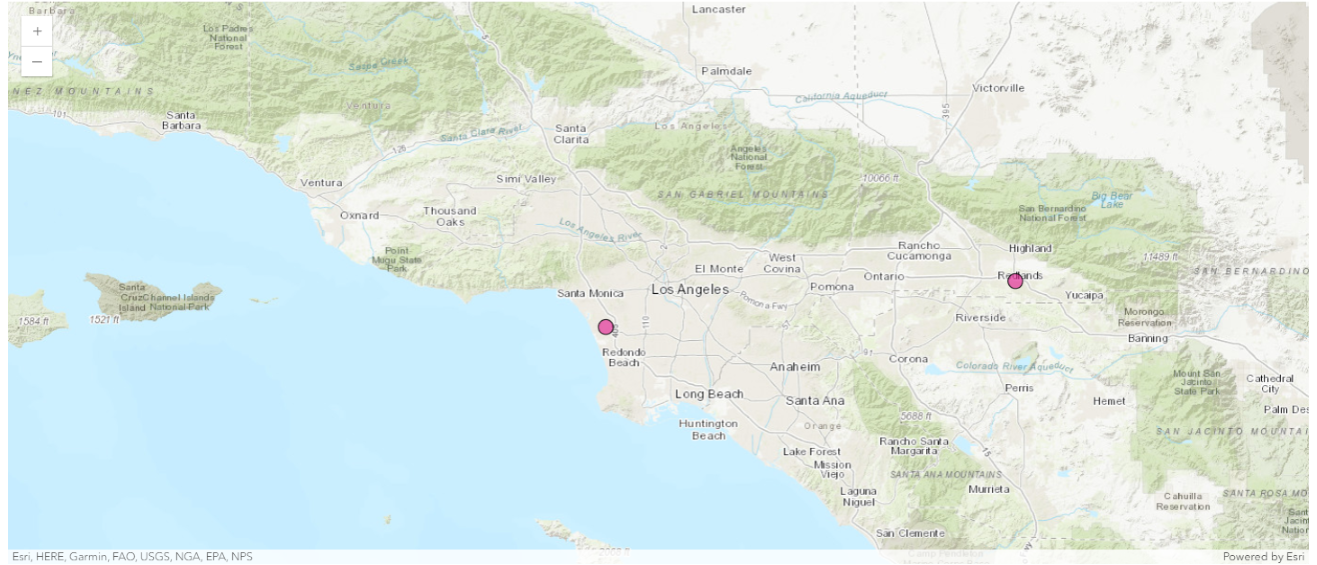

In [50]:
map1 = Map("Los Angeles")
map1

In [45]:
map1.zoom = 9

In [46]:
for address in results:
    address['location'].update({"spatialReference" : {"wkid" : 4326}})

In [47]:
for address in results:
    map1.content.draw(address['location'])

## Get geocoded results as a `FeatureSet` object

When `as_featureset` is set to True, we can get the geocoded results as a `FeatureSet` object, which is more convenient for being plotted on the map, and shown as `DataFrame` than when the results set is generated as a `dict` object.

In [48]:
results_fset = batch_geocode(addresses,
                             as_featureset=True)
results_fset

<FeatureSet> 2 features


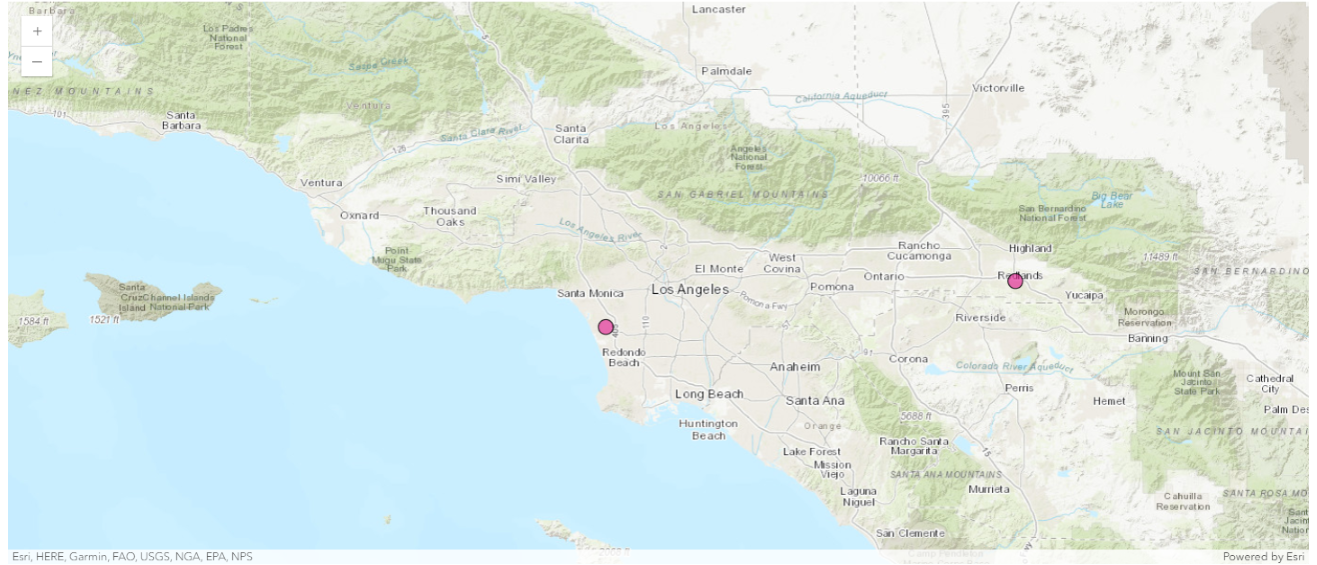

In [49]:
map1b = Map("Los Angeles")
map1b

In [19]:
map1b.zoom = 9

In [53]:
for feature in results_fset.features:
    map1b.content.draw(feature.geometry)

In [54]:
results_fset.sdf

ResultID Loc_name Status  Score  \
0         0    World      M    100   
1         1    World      M    100   

                                     Match_addr  \
0  380 New York St, Redlands, California, 92373   
1   1 World Way, Los Angeles, California, 90045   

                                   LongLabel       ShortLabel     Addr_type  \
0  380 New York St, Redlands, CA, 92373, USA  380 New York St  PointAddress   
1   1 World Way, Los Angeles, CA, 90045, USA      1 World Way  PointAddress   

  Type PlaceName  ...          Y    DisplayX   DisplayY        Xmin  \
0                 ...  34.057252  -117.19479  34.057265  -117.19579   
1                 ...  33.945058 -118.398162  33.944686 -118.399162   

         Xmax       Ymin       Ymax ExInfo OBJECTID  \
0  -117.19379  34.056265  34.058265               1   
1 -118.397162  33.943686  33.945686               2   

                                               SHAPE  
0  {"x": -117.195649834906, "y": 34.057251584743,...  
1  {"x": -118.398102660849, "y": 33.945058427725,...  

[2 rows x 61 columns]

## Batch geocoding using geocode_from_items()

The `batch_geocode()` function geocodes a table or file of addresses and returns the geocoded results. It supports CSV, XLS or table input. The task geocodes the entire file regardless of size. We can first take a look at its signature with `help()`:

In [4]:
from arcgis.geocoding import geocode_from_items

help(geocode_from_items)

Help on function geocode_from_items in module arcgis.geocoding._functions:

geocode_from_items(input_data: 'Union[Item, str, FeatureLayer]', output_type: 'str' = 'Feature Layer', geocode_service_url: 'Optional[Union[str, Geocoder]]' = None, geocode_parameters: 'Optional[dict[str, Any]]' = None, country: 'Optional[str]' = None, output_fields: 'Optional[str]' = None, header_rows_to_skip: 'int' = 1, output_name: 'Optional[str]' = None, category: 'Optional[str]' = None, context: 'Optional[dict[str, Any]]' = None, gis: 'Optional[GIS]' = None)
    The ``geocode_from_items`` method creates :class:`~arcgis.geocoding.Geocoder` objects from an
    :class:`~arcgis.gis.Item` or ``Layer`` objects.
    
    .. note::
        ``geocode_from_items`` geocodes the entire file regardless of size.
    
    =====================     ================================================================
    **Parameter**              **Description**
    ---------------------     ----------------------------------

The `geocode_from_items()` function is popular because it allows the user to input a web item (e.g. a `CSV` file that has been uploaded to your organization before hand) and generate a resulting web item (in this case, we have specified the `output_type` as `Feature Layer`). Let's look at an example below:

In [31]:
csv_item = gis.content.search("addresses", item_type="CSV")[0]
csv_item

<Item title:"Addresses" type:CSV owner:arcgispyapibot>

In [33]:
from arcgis.geocoding import analyze_geocode_input
my_geocode_parameters = analyze_geocode_input(
    input_table_or_item=csv_item,
    input_file_parameters= {
        "fileType":"csv",
        "headerRowExists":"true",
        "columnDelimiter":"COMMA",
        "textQualifier":""
    }
)
my_geocode_parameters

{'header_row_exists': True,
 'column_delimiter': 'COMMA',
 'text_qualifier': '',
 'field_info': '[["Incomplete", "TEXT", 255], ["Country", "TEXT", 255], ["Address", "TEXT", 255]]',
 'field_mapping': '[["Address", "Address"], ["Incomplete", ""], ["Country", "CountryCode"]]',
 'column_names': '',
 'file_type': 'csv',
 'singleline_field': 'SingleLine'}

In [35]:
from arcgis.geocoding import geocode_from_items
fl_item = geocode_from_items(
    input_data=csv_item, 
    output_type="Feature Layer",
    geocode_parameters=my_geocode_parameters,
    output_name="address_all_matching",
    gis=gis
)

In [36]:
fl_item

<Item title:"Geocoded_Feature_Service_address_all_matching" type:Feature Layer Collection owner:arcgis_python>

## Example of geocoding POIs (category param)

### `category` parameter
The `category` parameter is a place or address type which can be used to filter batch geocoding results. The parameter supports input of single category values or multiple comma-separated values. 

Single category filtering example:
```
category="Address"
```

Multiple category filtering example:
```
category="Address,Postal"
```

We will now explore some examples taking advantage of the `category` parameter, in the following orders:
 - airports using their codes
 - a list of city names
 - restaurants of a few different sub-categories (Peruvian, Japanese, Korean, French..)

### Example: Finding airports using their codes

In [46]:
for airport in airports:
    airport['location'].update({"spatialReference" : {"wkid" : 4326}})

In [47]:
for airport in airports:
    popup = PopupInfo(**{ 
        "title" : airport['attributes']['PlaceName'], 
        "description" : airport['address']
        }
    )
    map2.content.draw(airport['location'], popup)

In [132]:
airports = batch_geocode(["LAX", "SFO", "ONT", "FAT", "LGB"], category="airport")


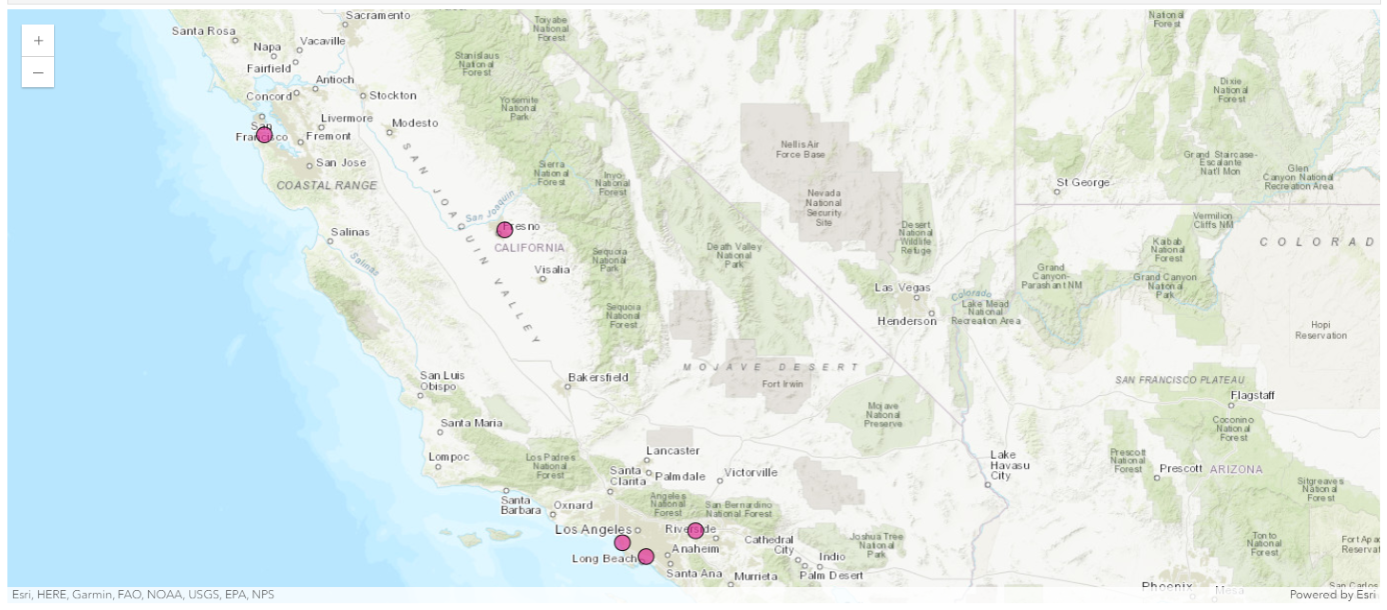

In [48]:
map2 = Map("CA")
map2

In [134]:
map2.zoom = 6

In [144]:
for airport in airports:
    airport['location'].update({"spatialReference" : {"wkid" : 4326}})

In [140]:
for airport in airports:
    popup = PopupInfo(**{ 
        "title" : airport['attributes']['PlaceName'], 
        "description" : airport['address']
        }
    )
    map2.content.draw(airport['location'], popup)

## Examples of `source_country` and `lang_code`

### `source_country` parameter

The `source_country` parameter is a value representing the country. When a value is passed for this parameter, all of the addresses in the input table are sent to the specified country locator to be geocoded. For example, if `source_country="USA"` is passed in a `batch_geocode()` call, it is assumed that all of the addresses are in the United States, and so all of the addresses are sent to the USA country locator. Using this parameter can increase batch geocoding performance when all addresses are within a single country.

Acceptable values include the full country name, the `ISO 3166-1 2-digit country code`, or the `ISO 3166-1 3-digit country code`.

A list of supported countries and codes is available <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocode-coverage.htm">here</a>.

Example:
```
source_country="USA"
```

### `lang_code` parameter

The `lang_code` parameter is optional. When specified, you can set the language in which geocode results are returned. See the <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocode-coverage.htm">table</a> of supported countries for valid language code values in each country.

### Example: Finding Indian Cities and Return Results in Hindi

In [141]:
india_cities = batch_geocode(["Mumbai", "New Dehli", "Kolkata"], 
                             category="city", 
                             source_country="IND",
                             lang_code="HI")
for city in india_cities:
    print(city['address'])

कोलकाता, पश्चिम बंगाल
मुंबई, महाराष्ट्र
नई दिल्ली, दिल्ली



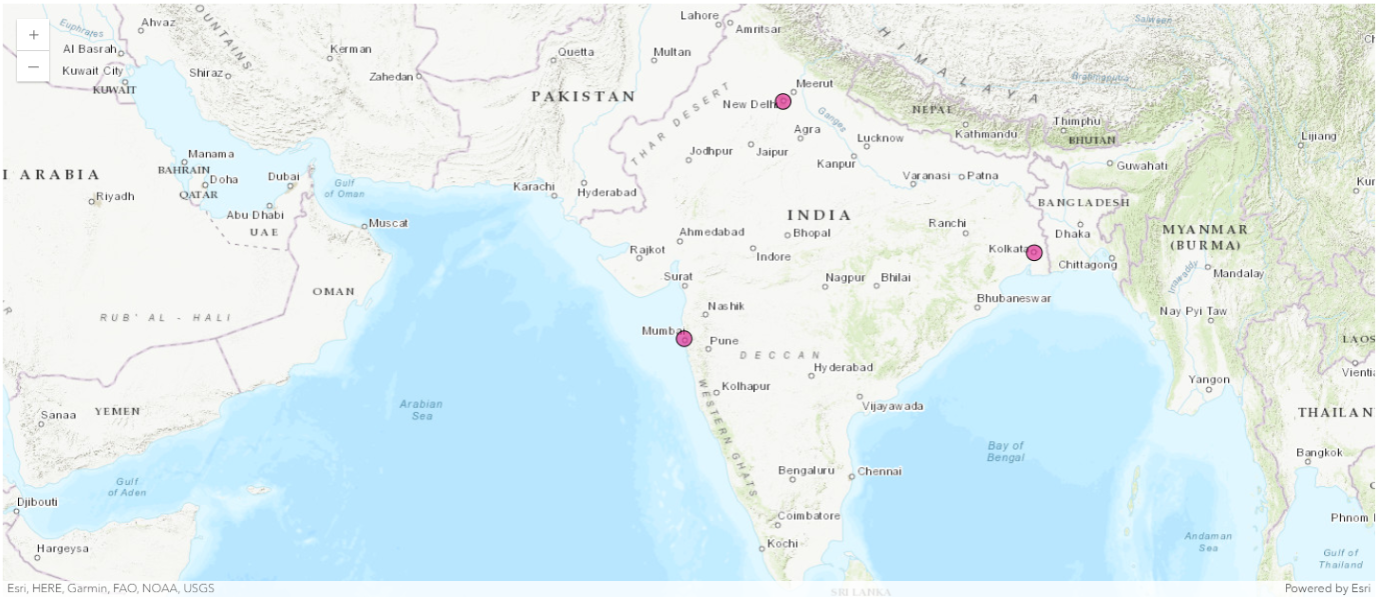

In [47]:
india_map = Map("India")
india_map

In [145]:
for city in india_cities:
    city['location'].update({"spatialReference" : {"wkid" : 4326}})

In [146]:
for city in india_cities:
    india_map.content.draw(city['location'])

##  Getting results in desired coordinate system

### `out_sr` parameter
This parameter is the spatial reference of the x/y coordinates returned by the geocode method. It is useful for applications using a map with a spatial reference different than that of the geocoder.

The spatial reference can be specified as either a well-known ID (WKID) or as a <a href="http://resources.arcgis.com/EN/HELP/REST/APIREF/GEOMETRY.HTML#SR">JSON spatial reference object</a>. If outSR is not specified, the spatial reference of the output locations is the same as that of the geocoder. The World Geocoding Service spatial reference is WGS84 (WKID = 4326).

For a list of valid WKID values, see <a href="http://resources.arcgis.com/EN/HELP/REST/APIREF/PCS.HTML">Projected Coordinate Systems</a> and <a href="http://resources.arcgis.com/EN/HELP/REST/APIREF/GCS.HTML">Geographic Coordinate Systems</a>.

Example (102100 is the WKID for the Web Mercator projection):
```
out_sr=102100
```

In [152]:
for airport in airports:
    if airport["address"] == "LAX":
        print(airport['address'])
        print(airport['location'])

LAX
{'x': -118.405581418239, 'y': 33.945016955146, 'spatialReference': {'wkid': 4326}, 'type': 'point'}


For instance, the default output spatial reference is WGS84 with the WKID shown as 4326 (as shown in the previous cell). If we specify the `out_sr` as 102100, then the x/y coordinates being returned by `batch_geocode()` is now in Web Mercator, as displayed below:

In [148]:
airports_2 = batch_geocode(["LAX", "SFO", "ONT", "FAT", "LGB"], 
                           category="airport",
                           out_sr=102100)

In [153]:
for airport in airports_2:
    if airport['address'] == "LAX":
        print(airport['address'])
        print(airport['location'])

LAX
{'x': -13180849.0306, 'y': 4021421.5337999985}


## Avoiding fallbacks

You can also use category filtering to avoid "low resolution" fallback matches. By default, if the World Geocoding Service cannot find a match for an input address, it will automatically search for a lower match level, such as a street name, city, or postal code. For batch geocoding, a user may prefer that no match is returned in these cases so that they are not charged for the geocode. If a user passes category="Point Address,Street Address" in a `batch_geocode()` call, no fallback will occur if address matches cannot be found; the user will only be charged for the actual address matches.

### Example: Batch geocode with fallback allowed (no category)

In the example below, the second address is not matched to a point address, but is matched to the city instead, due to fallback.

In [5]:
results = batch_geocode(["380 New York St Redlands CA 92373",
                         "? Stanford Dr Escondido CA"])

In [6]:
for result in results:
    print("Score " + str(result['score']) + " : " + result['address'])

Score 100 : 380 New York St, Redlands, California, 92373
Score 92.97 : Sanford Rd, Escondido, California, 92026


### Example: Batch geocode with no fallback allowed (`category="Point Address"`)

In the example below, as a point address match is not found for the second address, there is no low resolution fallback, as the category has been set to Point Address. As a result, no match is returned for the second address:

In [3]:
results = batch_geocode([ "380 New York St Redlands CA 92373",
                          "? Stanford Dr Escondido CA"],
                          category="Street Address")

In [4]:
for result in results:
    print("Score " + str(result['score']) + " : " + result['address'])

Score 100 : 380 New York St, Redlands, California, 92373
Score 0 : 


## Conclusions

In this Part 4, we have explored the usage of `batch_geocode()` function and how the advanced parameters can help with fine-tuning and filtering the geocoded results.